In [1]:
import nltk
nltk.download('stopwords')
import random
from nltk.classify.scikitlearn import SklearnClassifier
import pickle
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from statistics import mode
from nltk.tokenize import word_tokenize
import re
import os

[nltk_data] Downloading package stopwords to /home/abdoul/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
files_pos = os.listdir('aclImdb/train/pos')
files_pos = [open('aclImdb/train/pos/'+f, 'r', encoding='utf-8').read() for f in files_pos]
files_neg = os.listdir('aclImdb/train/neg')
files_neg = [open('aclImdb/train/neg/'+f, 'r', encoding='utf-8').read() for f in files_neg]


In [3]:
len(files_pos), len(files_neg)

(12500, 12500)

In [4]:
files_pos = files_pos[0:1000]
files_neg = files_neg[0:1000]

In [5]:
all_words = []
documents = []

from nltk.corpus import stopwords
import re

stop_words = list(set(stopwords.words('english')))

# j is adject, r is adverb and v is verb

allowed_word_types = ["J"]

for p in files_pos:
    
    #create a list of tuples where the first element of each tuple is a review 
    # the second element is the label
    documents.append((p, "pos"))
    
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    #tokenize
    tokenized = word_tokenize(cleaned)
   
    #remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]
    
    #parts of speech tagging for each word
    
    pos = nltk.pos_tag(stopped)
    
    
    # make a list of all adjectives identified by the allowed word types list above
    
    for w in pos:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
        

for p in files_neg:
    
    #create a list of tuples where the first element of each tuple is a review 
    # the second element is the label
    documents.append((p, "neg"))
    
    
    # remove punctuations
    cleaned = re.sub(r'[^(a-zA-Z)\s]','', p)
    
    
    #tokenize
    tokenized = word_tokenize(cleaned)
    
    #remove stopwords
    stopped = [w for w in tokenized if not w in stop_words]
    
    #parts of speech tagging for each word
    
    neg = nltk.pos_tag(stopped)
    
    
    # make a list of all adjectives identified by the allowed word types list above
    
    for w in neg:
        if w[1][0] in allowed_word_types:
            all_words.append(w[0].lower())
            
            

In [6]:
# cearting a frequency distribution of each adjectives

all_words = nltk.FreqDist(all_words)
all_words

FreqDist({'good': 1101, 'great': 670, 'bad': 670, 'much': 517, 'many': 510, 'little': 504, 'first': 380, 'best': 369, 'real': 320, 'old': 312, ...})

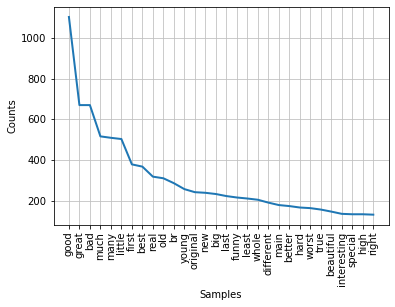

In [7]:
import matplotlib.pyplot as plt 
all_words.plot(30, cumulative=False)
plt.show()

In [8]:
#listing the 1000 most frequent words

word_features = list(all_words.keys())[:1000]
word_features

['special',
 'unknown',
 'powerful',
 'element',
 'radioactive',
 'classic',
 'footage',
 'electrical',
 'public',
 'unaware',
 'great',
 'best',
 'low',
 'animate',
 'multiple',
 'least',
 'title',
 'voyage',
 'young',
 'unclear',
 'last',
 'think',
 'strange',
 'distant',
 'differentiate',
 'different',
 'perspective',
 'parallel',
 'cameo',
 'main',
 'third',
 'medical',
 'short',
 'boatbr',
 'rid',
 'deep',
 'several',
 'sophomore',
 'filmstudent',
 'elaborate',
 'twelve',
 'mistaken',
 'big',
 'crew',
 'beautiful',
 'bit',
 'end',
 'suspenseful',
 'deserted',
 'first',
 'little',
 'boy',
 'stressful',
 'prepared',
 'white',
 'moved',
 'many',
 'precious',
 'such',
 'girl',
 'human',
 'fake',
 'wonderful',
 'immersed',
 'quite',
 'interesting',
 'smile',
 'downward',
 'saw',
 'later',
 'upbr',
 'hadnt',
 'delightful',
 'tearsbr',
 'gentle',
 'light',
 'emotional',
 'review',
 'good',
 'positive',
 'old',
 'forgotten',
 'ancient',
 'dead',
 'evil',
 'harness',
 'modern',
 'charm',
 

In [9]:
# function to create a dictionary of features for each review in the list document
# the keys are the words in word_features
#the values of each key are either true or false


def find_features(document):
    words = word_tokenize(document)
    features = {}
    for w in word_features:
        features[w] = (w in words)
    return features

#creating features for each review 

featuresets = [(find_features(rev), category) for (rev, category) in documents]

#shuffling the documents

random.shuffle(featuresets)

training_set = featuresets[:800]
testing_set = featuresets[800:]

In [10]:
featuresets[1]

({'special': False,
  'unknown': False,
  'powerful': False,
  'element': False,
  'radioactive': False,
  'classic': False,
  'footage': False,
  'electrical': False,
  'public': False,
  'unaware': False,
  'great': False,
  'best': False,
  'low': False,
  'animate': False,
  'multiple': False,
  'least': False,
  'title': False,
  'voyage': False,
  'young': False,
  'unclear': False,
  'last': False,
  'think': False,
  'strange': False,
  'distant': False,
  'differentiate': False,
  'different': False,
  'perspective': False,
  'parallel': False,
  'cameo': False,
  'main': False,
  'third': False,
  'medical': False,
  'short': False,
  'boatbr': False,
  'rid': False,
  'deep': False,
  'several': False,
  'sophomore': False,
  'filmstudent': False,
  'elaborate': False,
  'twelve': False,
  'mistaken': False,
  'big': False,
  'crew': False,
  'beautiful': False,
  'bit': False,
  'end': False,
  'suspenseful': False,
  'deserted': False,
  'first': False,
  'little': False,


In [15]:
classifier = nltk.NaiveBayesClassifier.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(classifier, testing_set)*100}")

classifier.show_most_informative_features(15)

Classifier accuracy percent: 74.66666666666667
Most Informative Features
                   worst = True              neg : pos    =      9.0 : 1.0
               wonderful = True              pos : neg    =      8.4 : 1.0
                   awful = True              neg : pos    =      8.1 : 1.0
                greatest = True              pos : neg    =      7.8 : 1.0
               laughable = True              neg : pos    =      7.3 : 1.0
                 amazing = True              pos : neg    =      7.2 : 1.0
              remarkable = True              pos : neg    =      6.7 : 1.0
                gorgeous = True              pos : neg    =      6.0 : 1.0
             magnificent = True              pos : neg    =      6.0 : 1.0
             outstanding = True              pos : neg    =      6.0 : 1.0
                standard = True              pos : neg    =      6.0 : 1.0
                  subtle = True              pos : neg    =      6.0 : 1.0
                  bother = 

In [16]:
from sklearn import metrics

MNB_clf = SklearnClassifier(MultinomialNB())
mnb_cls = MNB_clf.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(mnb_cls, testing_set)*100}")


Classifier accuracy percent: 75.25


In [19]:

BNB_clf = SklearnClassifier(BernoulliNB())
bnb_cls = BNB_clf.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(bnb_cls, testing_set)*100}")


Classifier accuracy percent: 75.16666666666667


In [21]:

logReg_clf = SklearnClassifier(LogisticRegression())
logReg_cls = logReg_clf.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(logReg_cls, testing_set)*100}")


Classifier accuracy percent: 73.41666666666666


In [22]:

SGD_clf = SklearnClassifier(SGDClassifier())
sgd_cls = BNB_clf.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(sgd_cls, testing_set)*100}")


Classifier accuracy percent: 75.16666666666667


In [23]:

SVC_clf = SklearnClassifier(SVC())
svc_cls = BNB_clf.train(training_set)

print(f"Classifier accuracy percent: {nltk.classify.accuracy(svc_cls, testing_set)*100}")


Classifier accuracy percent: 75.16666666666667
